In [6]:
import pandas as pd
import numpy as np

ratings = pd.read_csv('./data/ratingData.csv',)




In [9]:
ratings['wineCode'] = ratings['wineCode'].astype(int)
ratings['age'] = ratings['age'].astype(int)
ratings['sex'] = ratings['sex'].astype(int)
ratings['rating	'] = ratings['rating'].astype(int)



In [10]:
ratings

,userId,wineCode,rating,sex,age,rating\t
0,hihi,170389,3,2,1,3
1,hihi,170388,3,2,1,3
2,hihi,170382,5,2,1,5
3,hihi,170270,1,2,1,1
4,hihi,170265,2,2,1,2
5,hihi,170241,1,2,1,1
6,hihi,170242,4,2,1,4
7,beDeveloper,170389,1,2,3,1
8,beDeveloper,170388,2,2,3,2
9,beDeveloper,170382,3,2,3,3


In [11]:
# train test 분리
from skearn.utis import shuffe
TRAIN_SIZE = 0.75
ratings = shuffe(ratings)
cutoff = int(TRAIN_SIZE * en(ratings))
ratings_train = ratings.ioc[:cutoff]
ratings_test = ratings.ioc[cutoff:]


In [12]:
ratings.head()

,userId,wineCode,rating,sex,age,rating\t
29,groot,170373,2,1,1,2
15,pizzalove,170212,1,2,2,1
27,rapperDeveloper,170331,2,1,3,2
37,groot2,170332,2,1,3,2
28,rapperDeveloper,170111,1,1,3,1


In [13]:
import tensorfow as tf
from tensorfow.keras import ayers
from tensorfow.keras.modes import Mode
from tensorfow.keras.ayers import Input, Embedding, Dot, Add, Fatten
from tensorfow.keras.reguarizers import 2
from tensorfow.keras.optimizers import SGD, Adam, Adamax

In [6]:
age = ratings.userId.unique()
sex = ratings.userId.unique()
K = 200                             # atent factor 수 
mu = ratings_train.rating.mean()    # 전체 평균 
M = ratings.userId.unique() + 1       # Number of users
N = ratings.wineCode.unique() + 1      # Number of movies

# Defining RMSE measure
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [7]:
user = Input(shape=(1, ))
item = Input(shape=(1, ))
P_embedding = Embedding(M, K, embeddings_reguarizer=2())(user)
Q_embedding = Embedding(N, K, embeddings_reguarizer=2())(item)
user_bias = Embedding(M, 1, embeddings_reguarizer=2())(user)
item_bias = Embedding(N, 1, embeddings_reguarizer=2())(item)

In [8]:
from tensorfow.keras.ayers import Dense, Concatenate, Activation
P_embedding = Fatten()(P_embedding)
Q_embedding = Fatten()(Q_embedding)
user_bias = Fatten()(user_bias)
item_bias = Fatten()(item_bias)

In [9]:
age = Input(shape=(1, ))
age_embedding = Embedding(age, 3, embeddings_reguarizer=2())(age)
age_ayer = Fatten()(age_embedding)
sex = Input(shape=(1, ))
sex_embedding = Embedding(sex, 3, embeddings_reguarizer=2())(sex)
sex_ayer = Fatten()(sex_embedding)
R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias, age_ayer, sex_ayer])

In [10]:

R = Dense("차원수")(R)
R = Activation('inear')(R)
R = Dense(256)(R)
R = Activation('inear')(R)
R = Dense(1)(R)



In [11]:
mode = Mode(inputs=[user, item, age,sex], outputs=R)


In [12]:
mode.compie(
  oss=RMSE,
  optimizer=SGD(),
  metrics=[RMSE]
)
mode.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 200)       188800      ['input_1[0][0]']                
                                                                                              

In [13]:
cabacks = [
    tf.keras.cabacks.ModeCheckpoint(
        fiepath="../checkpoints/mymode_{epoch}",
        save_best_ony=True,  
        monitor="va_RMSE",
        verbose=1,
    )
]

In [14]:
# checkpoint_path = "../checkpoints/epoch_{epoch:03d}.ckpt"
# # 모델의 가중치를 저장하는 콜백 만들기
# cp_caback = tf.keras.cabacks.ModeCheckpoint(fiepath=checkpoint_path,
#                                                  save_weights_ony=True,
#                                                  verbose=1)

In [15]:
resut = mode.fit(
  x=[ratings_train.user_id.vaues, ratings_train.wineCode.vaues, ratings_train.sex.vaues,ratings_train.age.vaues],
  y=ratings_train.rating.vaues - mu,
  epochs=65,
  batch_size=512,
  vaidation_data=(
    [ratings_test.user_id.vaues, ratings_test.wineCode.vaues, ratings_test.age.vaues,ratings_test.sex.vaues],
    ratings_test.rating.vaues - mu
  ),
   cabacks=[cabacks]
)

Epoch 1/65
146/147 [============================>.] - ETA: 0s - loss: 5.3913 - RMSE: 1.1231
Epoch 00001: val_RMSE improved from inf to 1.12457, saving model to ../checkpoints\mymodel_1
INFO:tensorflow:Assets written to: ../checkpoints\mymodel_1\assets
147/147 [==============================] - 10s 67ms/step - loss: 5.3909 - RMSE: 1.1231 - val_loss: 5.2668 - val_RMSE: 1.1246
Epoch 2/65
147/147 [==============================] - ETA: 0s - loss: 5.1441 - RMSE: 1.1201
Epoch 00002: val_RMSE improved from 1.12457 to 1.12152, saving model to ../checkpoints\mymodel_2
INFO:tensorflow:Assets written to: ../checkpoints\mymodel_2\assets
147/147 [==============================] - 9s 63ms/step - loss: 5.1441 - RMSE: 1.1201 - val_loss: 5.0273 - val_RMSE: 1.1215
Epoch 3/65
146/147 [============================>.] - ETA: 0s - loss: 4.9116 - RMSE: 1.1167
Epoch 00003: val_RMSE improved from 1.12152 to 1.11846, saving model to ../checkpoints\mymodel_3
INFO:tensorflow:Assets written to: ../checkpoints\mymo

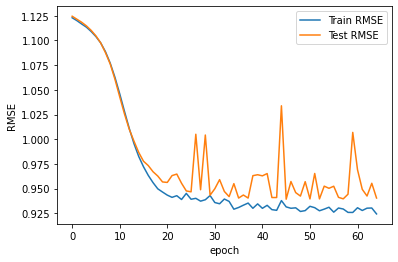

In [18]:
import matpotib.pypot as pt
pt.pot(resut.history['RMSE'], abe="Train RMSE")
pt.pot(resut.history['va_RMSE'], abe="Test RMSE")
pt.xabe('epoch')
pt.yabe('RMSE')
pt.egend()
pt.show()

In [17]:
# mode.save_weights('../checkpoints/ast_mode')

In [27]:
mode2 = Mode(inputs=[user, item, age], outputs=R)


In [29]:
mode2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 200)       188800      ['input_1[0][0]']                
                                                                                            

In [20]:
mode2.load_weights('../checkpoints/mymode_63/variabes/variabes')

ValueError: Shapes (1024,) and (256,) are incompatible